In [1]:
import pandas as pd
import seaborn as sns
import re
import string
import contractions
from nltk.tokenize import word_tokenize
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE, Laplace

# Pre-processing

In [2]:
def conv_uchar_to_space(string):
    return "".join([i if ord(i) < 128 else " " for i in string])

In [3]:
def preproc(filename):
    df = pd.read_csv(filename, delimiter="\t")
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    df = df[df["category"] != "not-Tamil"]
    df["text"] = df["text"].apply(conv_uchar_to_space)
    df["text"] = df["text"].apply(str.lower)
    df["text"] = df["text"].apply(lambda x: re.sub(r"\d+", "", x))
    df["text"] = df["text"].apply(contractions.fix)
    df["text"] = df["text"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))
    df.to_csv(f"{filename}_cleaned.csv", index=False)
    df["text"] = df["text"].apply(lambda x: word_tokenize(x))
    corpus = df["text"].tolist()
    return corpus

In [4]:
ignore = preproc('tamil_dev.tsv')

In [3]:
df = pd.read_csv("./tamil_train.tsv", delimiter="\t")

In [4]:
df.head()

,text,category
0,Trailer late ah parthavanga like podunga,Positive
1,Move pathutu vanthu trailer pakurvnga yaru,Positive
2,Puthupetai dhanush ah yarellam pathinga,Positive
3,"Dhanush oda character ,puthu sa erukay , mass ta",Positive
4,vera level ippa pesungada mokka nu thalaivaaaaaa,Positive


In [5]:
df.shape

(11335, 2)

In [6]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Distribution

<Axes: xlabel='category', ylabel='Count'>

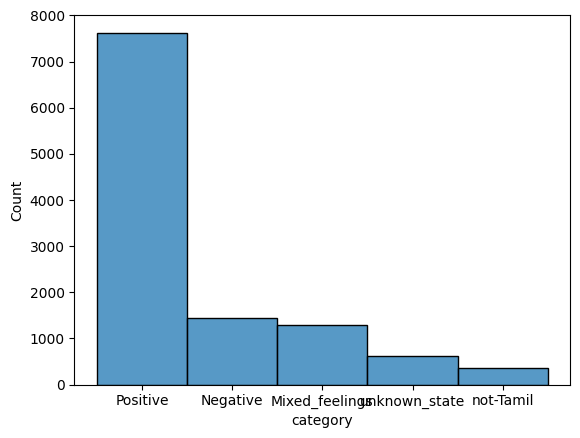

In [7]:
sns.histplot(data=df, x="category")

# Removing non-tamil sentences

In [8]:
(df["category"] == "not-Tamil").value_counts()

False    10967
True       368
Name: category, dtype: int64

In [9]:
df = df[df["category"] != "not-Tamil"]

In [10]:
df.shape

(10967, 2)

<Axes: xlabel='category', ylabel='Count'>

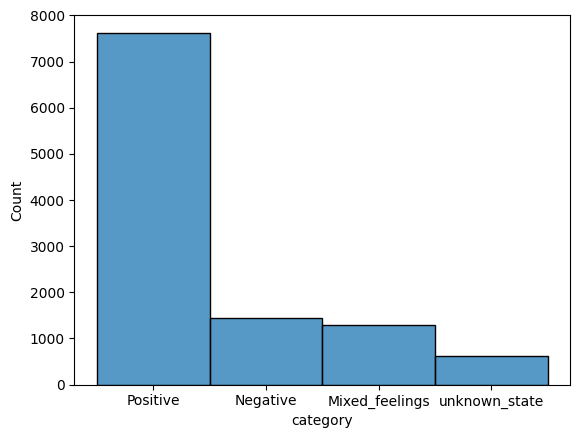

In [11]:
sns.histplot(data=df, x="category")

# Removing non-ASCII characters

In [12]:
def conv_uchar_to_space(string):
    return "".join([i if ord(i) < 128 else " " for i in string])

In [13]:
df["text"].apply(conv_uchar_to_space)


0                 Trailer late ah parthavanga like podunga
1               Move pathutu vanthu trailer pakurvnga yaru
2                 Puthupetai dhanush  ah yarellam pathinga
3         Dhanush oda character ,puthu sa erukay , mass ta
4         vera level ippa pesungada mokka nu thalaivaaaaaa
                               ...                        
11330           Yuvan shankar Raja anna fan's like here...
11331      A masterpiece best revenge film I ve ever scene
11332                Enna pa thala ya kamiya than katringa
11333                              R A A S H I K H A N N A
11334    Trailer la nalla thaan iruku ana sound thaan k...
Name: text, Length: 10967, dtype: object

In [14]:
df["text"] = df["text"].apply(conv_uchar_to_space)

In [15]:
df.head()

,text,category
0,Trailer late ah parthavanga like podunga,Positive
1,Move pathutu vanthu trailer pakurvnga yaru,Positive
2,Puthupetai dhanush ah yarellam pathinga,Positive
3,"Dhanush oda character ,puthu sa erukay , mass ta",Positive
4,vera level ippa pesungada mokka nu thalaivaaaaaa,Positive


# Converting to lowercase

In [16]:
df["text"].apply(str.lower)

0                 trailer late ah parthavanga like podunga
1               move pathutu vanthu trailer pakurvnga yaru
2                 puthupetai dhanush  ah yarellam pathinga
3         dhanush oda character ,puthu sa erukay , mass ta
4         vera level ippa pesungada mokka nu thalaivaaaaaa
                               ...                        
11330           yuvan shankar raja anna fan's like here...
11331      a masterpiece best revenge film i ve ever scene
11332                enna pa thala ya kamiya than katringa
11333                              r a a s h i k h a n n a
11334    trailer la nalla thaan iruku ana sound thaan k...
Name: text, Length: 10967, dtype: object

In [17]:
df["text"] = df["text"].apply(str.lower)

In [18]:
df.head()

,text,category
0,trailer late ah parthavanga like podunga,Positive
1,move pathutu vanthu trailer pakurvnga yaru,Positive
2,puthupetai dhanush ah yarellam pathinga,Positive
3,"dhanush oda character ,puthu sa erukay , mass ta",Positive
4,vera level ippa pesungada mokka nu thalaivaaaaaa,Positive


# Removing numbers

In [19]:
df["text"].apply(lambda x: re.sub(r"\d+", "", x))

0                 trailer late ah parthavanga like podunga
1               move pathutu vanthu trailer pakurvnga yaru
2                 puthupetai dhanush  ah yarellam pathinga
3         dhanush oda character ,puthu sa erukay , mass ta
4         vera level ippa pesungada mokka nu thalaivaaaaaa
                               ...                        
11330           yuvan shankar raja anna fan's like here...
11331      a masterpiece best revenge film i ve ever scene
11332                enna pa thala ya kamiya than katringa
11333                              r a a s h i k h a n n a
11334    trailer la nalla thaan iruku ana sound thaan k...
Name: text, Length: 10967, dtype: object

In [20]:
df["text"] = df["text"].apply(lambda x: re.sub(r"\d+", "", x))

# Expand contractions

In [21]:
df["text"].apply(contractions.fix)

0                 trailer late ah parthavanga like podunga
1               move pathutu vanthu trailer pakurvnga yaru
2                 puthupetai dhanush  ah yarellam pathinga
3         dhanush oda character ,puthu sa erukay , mass ta
4         vera level ippa pesungada mokka nu thalaivaaaaaa
                               ...                        
11330           yuvan shankar raja anna fan's like here...
11331      a masterpiece best revenge film i ve ever scene
11332                enna pa thala ya kamiya than katringa
11333                              r a a s h i k h a n n a
11334    trailer la nalla thaan iruku ana sound thaan k...
Name: text, Length: 10967, dtype: object

In [22]:
df["text"] = df["text"].apply(contractions.fix)

# Remove punctuations

In [23]:
df["text"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))

0                 trailer late ah parthavanga like podunga
1               move pathutu vanthu trailer pakurvnga yaru
2                 puthupetai dhanush  ah yarellam pathinga
3           dhanush oda character puthu sa erukay  mass ta
4         vera level ippa pesungada mokka nu thalaivaaaaaa
                               ...                        
11330               yuvan shankar raja anna fans like here
11331      a masterpiece best revenge film i ve ever scene
11332                enna pa thala ya kamiya than katringa
11333                              r a a s h i k h a n n a
11334    trailer la nalla thaan iruku ana sound thaan k...
Name: text, Length: 10967, dtype: object

In [24]:
df["text"] = df["text"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))

In [25]:
df["text"].to_csv("cleaned.csv", index=False)

In [26]:
df.to_csv("cleaned_with_labels.csv", index=False)

# Tokenization

In [29]:
df["text"].apply(lambda x: word_tokenize(x))

0          [trailer, late, ah, parthavanga, like, podunga]
1        [move, pathutu, vanthu, trailer, pakurvnga, yaru]
2            [puthupetai, dhanush, ah, yarellam, pathinga]
3        [dhanush, oda, character, puthu, sa, erukay, m...
4        [vera, level, ippa, pesungada, mokka, nu, thal...
                               ...                        
11330       [yuvan, shankar, raja, anna, fans, like, here]
11331    [a, masterpiece, best, revenge, film, i, ve, e...
11332        [enna, pa, thala, ya, kamiya, than, katringa]
11333                 [r, a, a, s, h, i, k, h, a, n, n, a]
11334    [trailer, la, nalla, thaan, iruku, ana, sound,...
Name: text, Length: 10967, dtype: object

In [30]:
df["text"] = df["text"].apply(lambda x: word_tokenize(x))

In [31]:
df.head()

,text,category
0,"[trailer, late, ah, parthavanga, like, podunga]",Positive
1,"[move, pathutu, vanthu, trailer, pakurvnga, yaru]",Positive
2,"[puthupetai, dhanush, ah, yarellam, pathinga]",Positive
3,"[dhanush, oda, character, puthu, sa, erukay, m...",Positive
4,"[vera, level, ippa, pesungada, mokka, nu, thal...",Positive


In [32]:
corpus = df["text"].tolist()

# N-gram

In [30]:
train, vocab = padded_everygram_pipeline(2, corpus)

In [31]:
for _ in range(10):
    print(list(next(train)))

[('<s>',), ('<s>', 'trailer'), ('trailer',), ('trailer', 'late'), ('late',), ('late', 'ah'), ('ah',), ('ah', 'parthavanga'), ('parthavanga',), ('parthavanga', 'like'), ('like',), ('like', 'podunga'), ('podunga',), ('podunga', '</s>'), ('</s>',)]
[('<s>',), ('<s>', 'move'), ('move',), ('move', 'pathutu'), ('pathutu',), ('pathutu', 'vanthu'), ('vanthu',), ('vanthu', 'trailer'), ('trailer',), ('trailer', 'pakurvnga'), ('pakurvnga',), ('pakurvnga', 'yaru'), ('yaru',), ('yaru', '</s>'), ('</s>',)]
[('<s>',), ('<s>', 'puthupetai'), ('puthupetai',), ('puthupetai', 'dhanush'), ('dhanush',), ('dhanush', 'ah'), ('ah',), ('ah', 'yarellam'), ('yarellam',), ('yarellam', 'pathinga'), ('pathinga',), ('pathinga', '</s>'), ('</s>',)]
[('<s>',), ('<s>', 'dhanush'), ('dhanush',), ('dhanush', 'oda'), ('oda',), ('oda', 'character'), ('character',), ('character', 'puthu'), ('puthu',), ('puthu', 'sa'), ('sa',), ('sa', 'erukay'), ('erukay',), ('erukay', 'mass'), ('mass',), ('mass', 'ta'), ('ta',), ('ta', '</s

In [32]:
lm = MLE(2)

In [33]:
len(lm.vocab)

0

In [34]:
lm.fit(train, vocab)

In [35]:
print(lm.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 18404 items>


In [36]:
len(lm.vocab)

18404

In [37]:
lm.vocab.lookup(corpus[0])

('trailer', 'late', 'ah', 'parthavanga', 'like', 'podunga')

In [38]:
lm.vocab.lookup(["aliens", "from", "Mars"])

('aliens', 'from', '<UNK>')

In [39]:
print(lm.counts)

<NgramCounter with 2 ngram orders and 215479 ngrams>


In [40]:
lm.counts['thala']

1891

In [41]:
lm.generate(5)

['semma', 'yuvan', 'bgm', 'sema', '</s>']

In [42]:
test = preproc("./tamil_dev.tsv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_13080\295525903.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [43]:
test_bigram , _ = padded_everygram_pipeline(2, test)

In [44]:
test_bigram = list(test_bigram)

In [45]:
test_bigram = [list(x) for x in test_bigram]

In [46]:
lm.entropy(test_bigram)

inf

In [47]:
lm.entropy("thala")

10.450084564728012

In [48]:
lm.perplexity("trailer")

1791.6597380908224

In [49]:
lm.logscore("thala", ["mass"])

-4.367325230156131

In [50]:
lm.logscore("trailer", ["mass"])


-5.088609202090067

In [51]:
corpus

[['trailer', 'late', 'ah', 'parthavanga', 'like', 'podunga'],
 ['move', 'pathutu', 'vanthu', 'trailer', 'pakurvnga', 'yaru'],
 ['puthupetai', 'dhanush', 'ah', 'yarellam', 'pathinga'],
 ['dhanush', 'oda', 'character', 'puthu', 'sa', 'erukay', 'mass', 'ta'],
 ['vera', 'level', 'ippa', 'pesungada', 'mokka', 'nu', 'thalaivaaaaaa'],
 ['thala', 'mass', 'you', 'bgm', 'vera', 'level'],
 ['ivara', 'pathta', 'death', 'vadi', 'madiri', 'irukku'],
 ['s',
  'kids',
  'reference',
  'maadila',
  'irunthu',
  'kudicha',
  'shakthiman',
  'kaapathvaaru'],
 ['aiyoo', 'thala', 'mass', 'pannita', 'thala'],
 ['enpt',
  'ku',
  'kaathu',
  'kadanthathellam',
  'oru',
  'nimishathula',
  'poiruchu'],
 ['when',
  'pandey',
  'gets',
  'up',
  'vandumurugan',
  'i',
  'am',
  'speaking',
  'no',
  'cross',
  'speaking',
  'sittt',
  'downnn'],
 ['remake', 'of', 'malayalam', 'mohanlal', 'movie', 'devadoodhan'],
 ['tharamaana', 'sirappaana', 'sambavam', 'inimeal', 'ta', 'paaka', 'pora'],
 ['viswasam', 'trailer'

In [52]:
import os
parent=os.getcwd()

In [54]:
len(corpus)

10967

In [53]:
'''
from google.cloud import translate_v2 as translate
from tqdm import tqdm

def translate_text(text, target_language):
    client = translate.Client.from_service_account_json(parent+"\cryptic-net-402814-0189466d68ec.json")
    result = client.translate(text, source_language='en',target_language=target_language)
    return result["input"], result["translatedText"]

# Input English text
file1=open('tamilwords3.txt','w',encoding='utf-8')


target_language = "ta"
count=0
l=len(corpus)
with tqdm(range(l), desc="Processing", ncols=100) as pbbar:
    for i in corpus:
        words=[]
        for j in i:
        #sentence=' '.join(i)
           
    
            translated_text = translate_text(j, target_language)
            words.append(translated_text[1])
    
        file1.write(' '.join(words)+'\n')
        count+=1
        if count==1:
            break
        pbbar.update(1)
    file1.close()
    
'''


'\nfrom google.cloud import translate_v2 as translate\nfrom tqdm import tqdm\n\ndef translate_text(text, target_language):\n    client = translate.Client.from_service_account_json(parent+"\\cryptic-net-402814-0189466d68ec.json")\n    result = client.translate(text, source_language=\'en\',target_language=target_language)\n    return result["input"], result["translatedText"]\n\n# Input English text\nfile1=open(\'tamilwords3.txt\',\'w\',encoding=\'utf-8\')\n\n\ntarget_language = "ta"\ncount=0\nl=len(corpus)\nwith tqdm(range(l), desc="Processing", ncols=100) as pbbar:\n    for i in corpus:\n        words=[]\n        for j in i:\n        #sentence=\' \'.join(i)\n           \n    \n            translated_text = translate_text(j, target_language)\n            words.append(translated_text[1])\n    \n        file1.write(\' \'.join(words)+\'\n\')\n        count+=1\n        if count==1:\n            break\n        pbbar.update(1)\n    file1.close()\n    \n'